In [93]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

['../InputData/pT_Rebin_1/pp_SE_L0_Correlation_GMB_Ratio.root', '../InputData/pT_Rebin_1/pPb_SE_L0_Correlation_GMB_Ratio.root']
[12.0, 40.0]


In [94]:
print(N_dPhi_Bins)
print(dPhi_Bins)
print("")
print(delta_phi_centers)

8
[0.0, 0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345]

[0.5890486225480862, 0.9817477042468103, 1.3744467859455345, 1.7671458676442586, 2.1598449493429825, 2.552544031041707, 2.945243112740431]


In [95]:
Corrs = ROOT_to_nparray()


 
                                       PROTON-PROTON

 
                                       PROTON-LEAD


<Figure size 2664x1224 with 0 Axes>

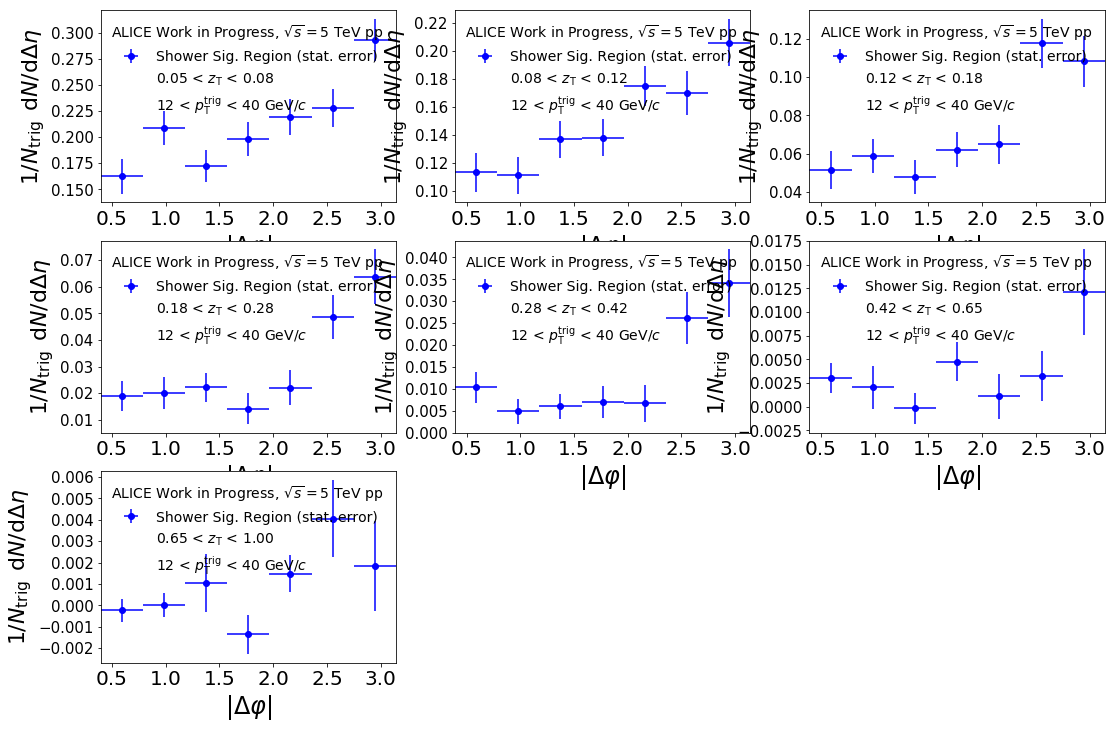

<Figure size 2664x1224 with 0 Axes>

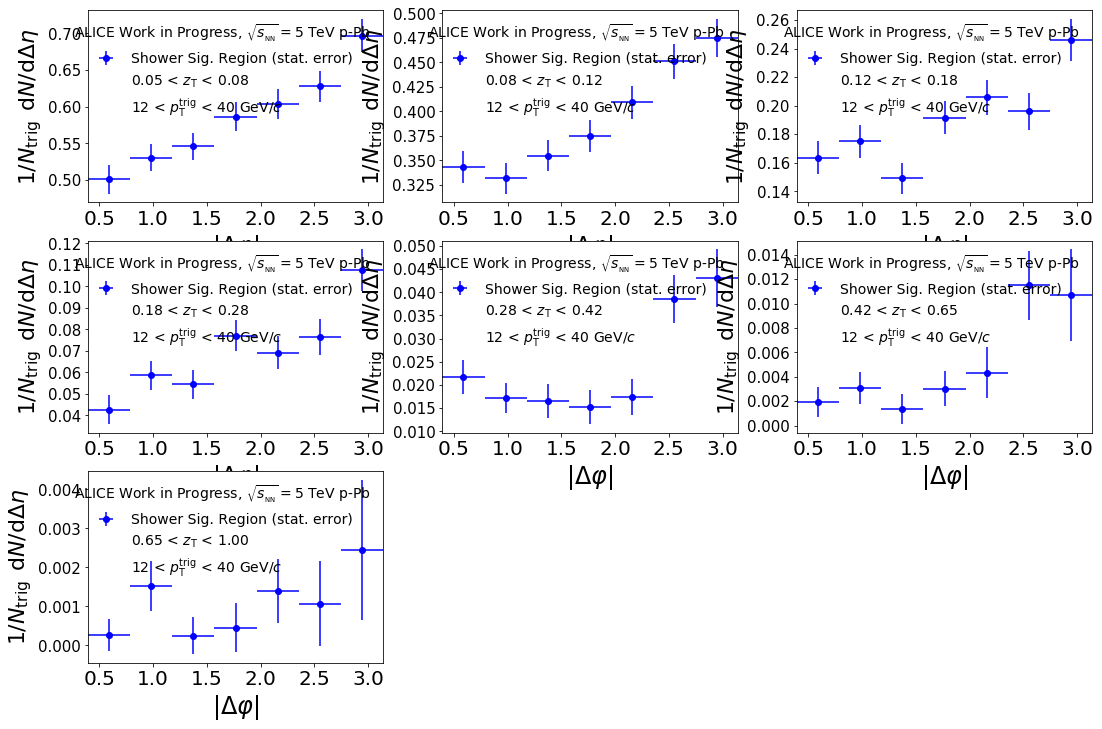

<Figure size 1728x864 with 0 Axes>

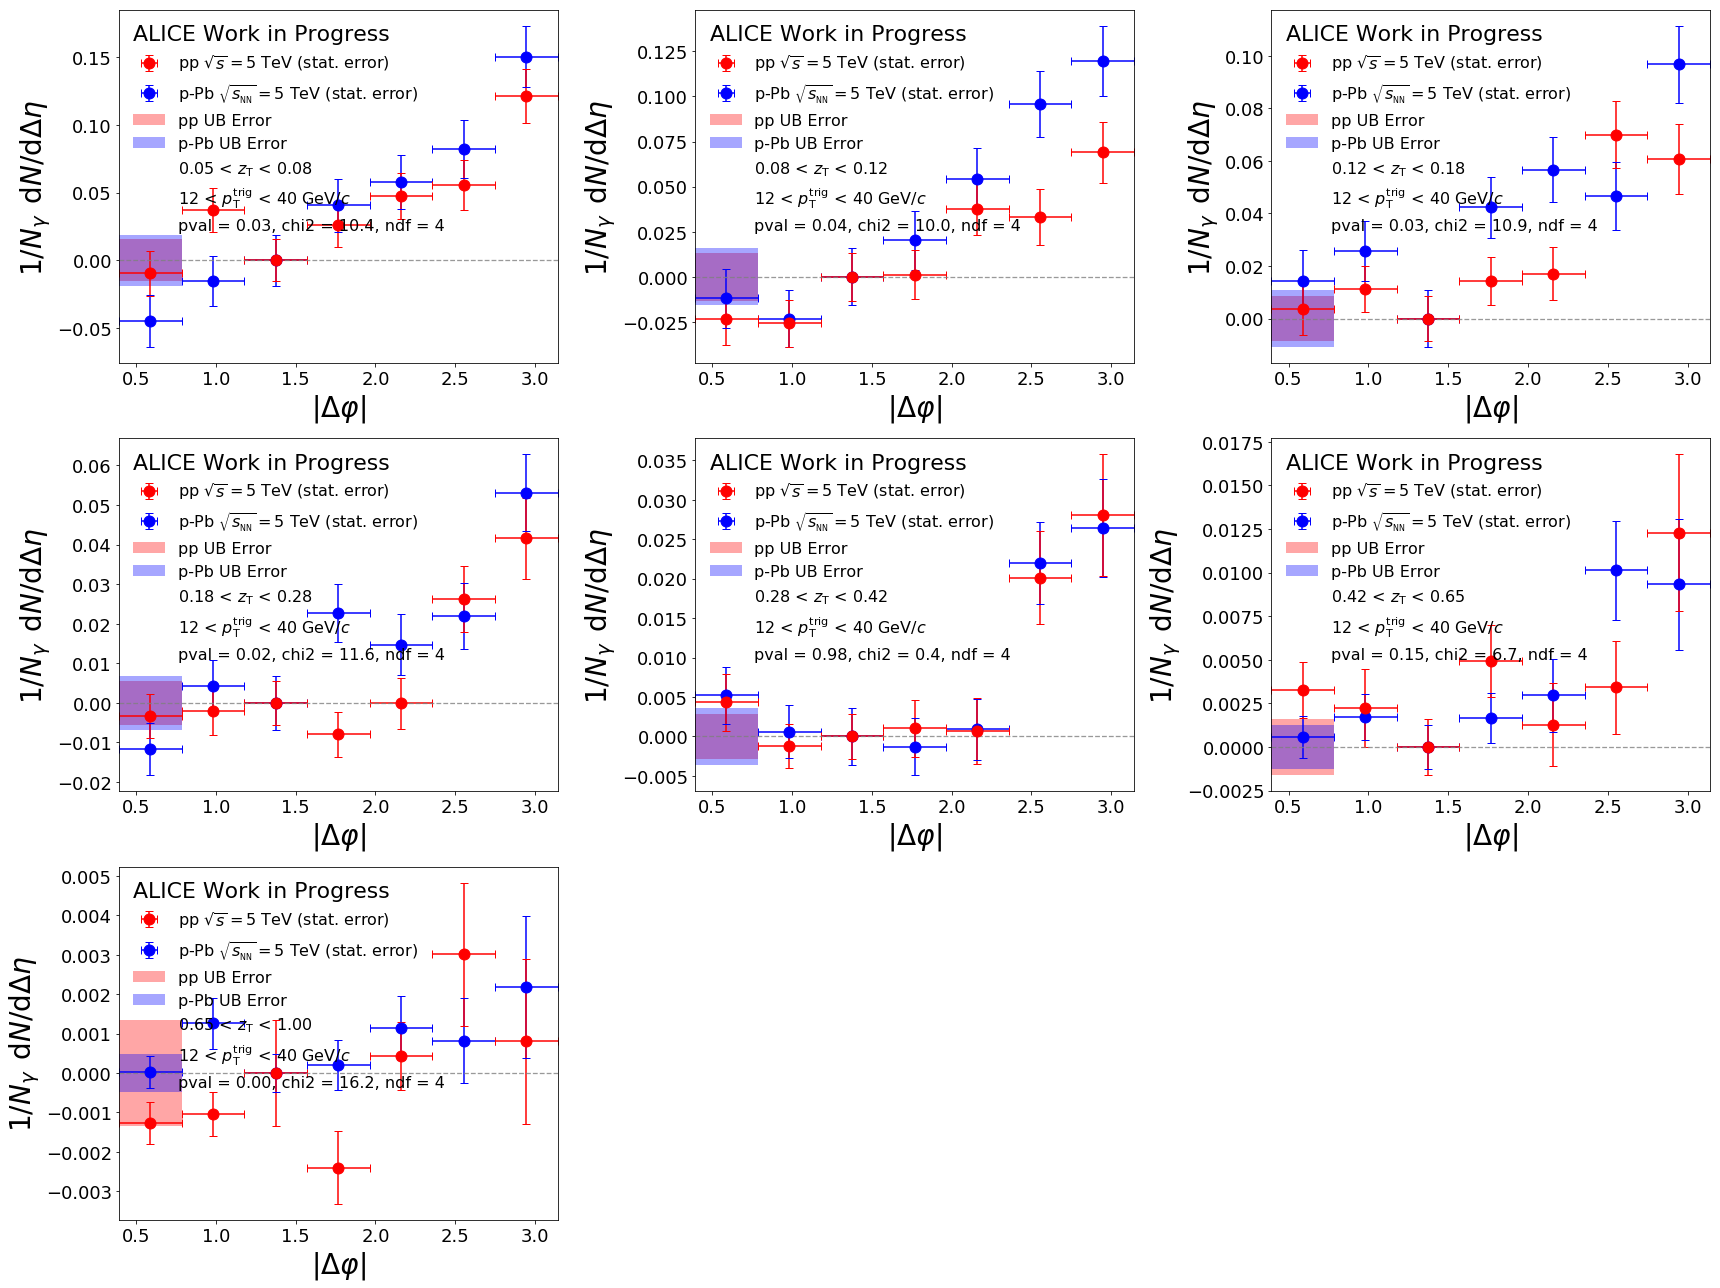

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10

In [96]:
Show_Plots = True
if (Ped_Sub_First):
    if (Show_Plots):
        Plot_UB()
        Plot_Sub_UB_Overlay(Corrs)
    Correlated_Subtraction(Corrs)
    
else:
    Correlated_Subtraction_Weights(Corrs)
    #Correlated_Subtraction(Corrs)
    if (Show_Plots):
        Plot_UB_Subtraction(Corrs)
    Ped_Sub_After_Cs(Corrs)
    if (Show_Plots):
        Plot_pp_pPb_Cs(Corrs)

$C_S = \frac{C_{SR} - (1-p) C_{BR}}{p}$

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

In [97]:
Frags = Get_Fragmentation(Corrs)

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}w_i x_i}{\sum_{i=1}^{n}w_i}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [98]:
Combined_Frags = Average_FF(Frags)

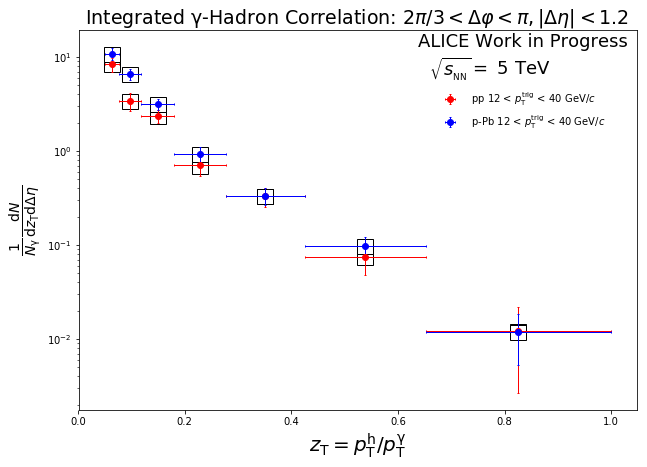

                    pp Central Values:
[ 8.39714579  3.40889969  2.35192612  0.70338196  0.33045848  0.07487091
  0.01220589]

                    pp Stat. Uncertainty:
[ 1.37764827  0.76094064  0.37232587  0.16619629  0.07489082  0.02667858
  0.00952525]

                    p-Pb Central Values:
[ 10.8758358    6.59335344   3.18227327   0.93145902   0.33365585
   0.09875375   0.0119124 ]

                    p-Pb Stat. Uncertainty:
[ 1.61645537  0.894529    0.4198702   0.17495204  0.06717309  0.02353523
  0.0066772 ]

                        LaTeX Table
Source   &  pp data & \pPb~data  \\
Statistical Uncertainty & 16\%-78\% & 13\%-56\% \\
\hline
Purity & 17\%-17\% & 17\%-17\% \\
Tracking Efficiency &  5\% & 5\%  \\ 


In [99]:
Plot_pp_pPb_Avg_FF(Combined_Frags)

In [100]:
reload(functions_fragmentation)
from functions_fragmentation import *

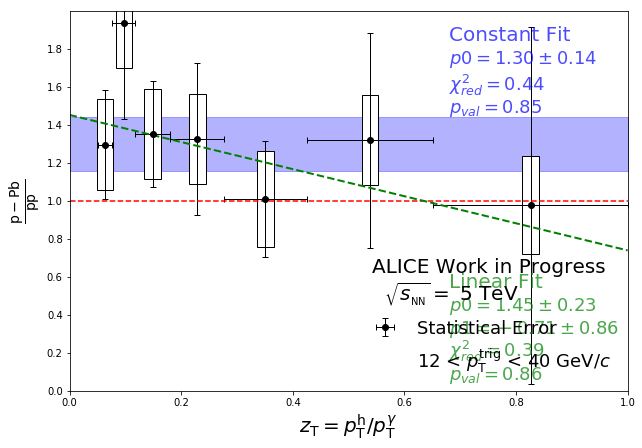

                Central Values:
[ 1.29518244  1.93415883  1.35304985  1.32425776  1.00967556  1.31898697
  0.97595493]

                Ratio Uncertainty from Purity:
[ 0.21930694  0.19541607  0.2158516   0.21752106  0.24431657  0.21783712
  0.24853251]

                Ratio Uncertainty from Single Track Efficiency:
[ 0.09158323  0.13676568  0.09567507  0.09363916  0.07139484  0.09326646
  0.06901043]

                Full Systematic Uncertainty:
[ 0.23766157  0.23852105  0.23610513  0.23681998  0.2545345   0.23696338
  0.25793575]

****************************************
Minimizer is Linear
Chi2                      =      2.63549
NDf                       =            6
p0                        =      1.29704   +/-   0.141221    

****************************************
Minimizer is Linear
Chi2                      =      1.95675
NDf                       =            5
p0                        =      1.45134   +/-   0.234568    
p1                        =    -0.711781   +/-   

In [101]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

## Compare Trigger pT Bins

In [9]:
reload(functions_correlations)
from functions_correlations import *

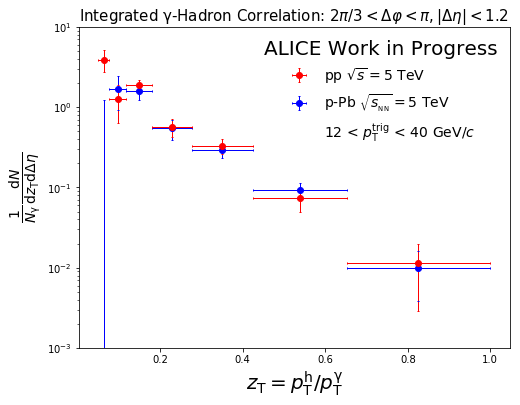

In [10]:
Plot_FF(Frags)

In [11]:
reload(functions_fragmentation)
from functions_fragmentation import *

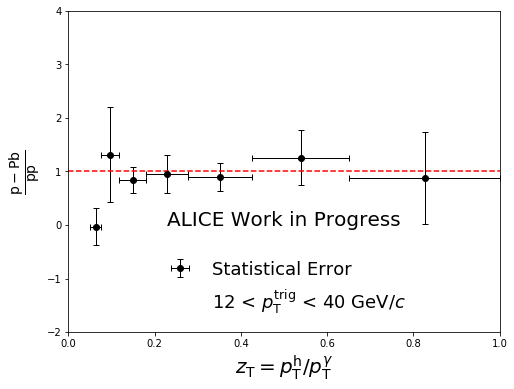

In [12]:
FF_Ratio(Frags)

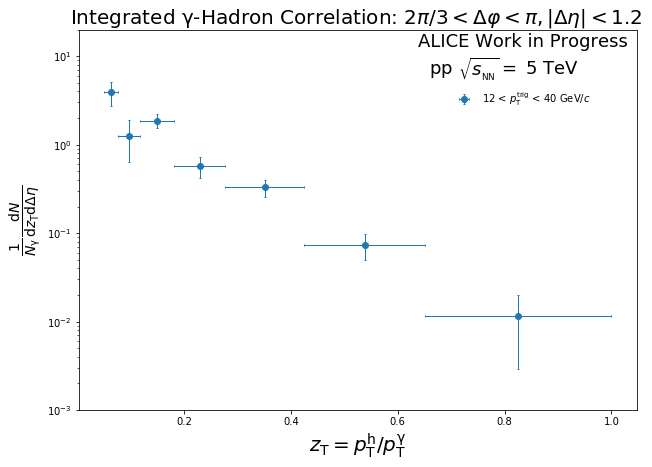

                             PROTON-PROTON:
Central Values
[[ 3.92461373  1.26929527  1.8732901   0.56981746  0.32841505  0.07355998
   0.01142899]]
Statistical Errors (Relative)
[[ 0.29522124  0.50331719  0.17410418  0.2613702   0.21175973  0.33238643
   0.74537084]]
Relative Uncertainty from Purity
[[ 0.68126441  0.22033396  0.32517999  0.09891326  0.05700879  0.0127691
   0.00198393]]




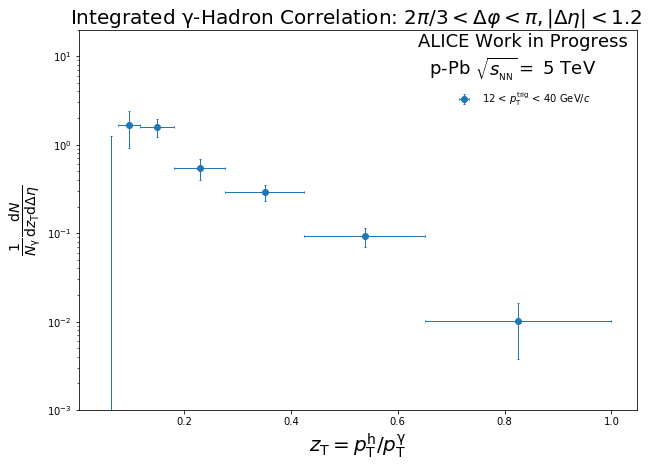

                              PROTON-LEAD:
Central Values
[[-0.11155612  1.67199044  1.5880619   0.54378975  0.2931703   0.09238417
   0.01006686]]
Statistical Errors (Relative)
[[-12.11437118   0.44744147   0.22520524   0.27500519   0.20400894
    0.24002676   0.62199045]]
Relative Uncertainty from Purity
[[-0.01936476  0.29023686  0.27566791  0.09439518  0.05089074  0.01603675
   0.00174748]]




In [13]:
Overlay_pT_FF(Frags)

## Compare Track Cuts

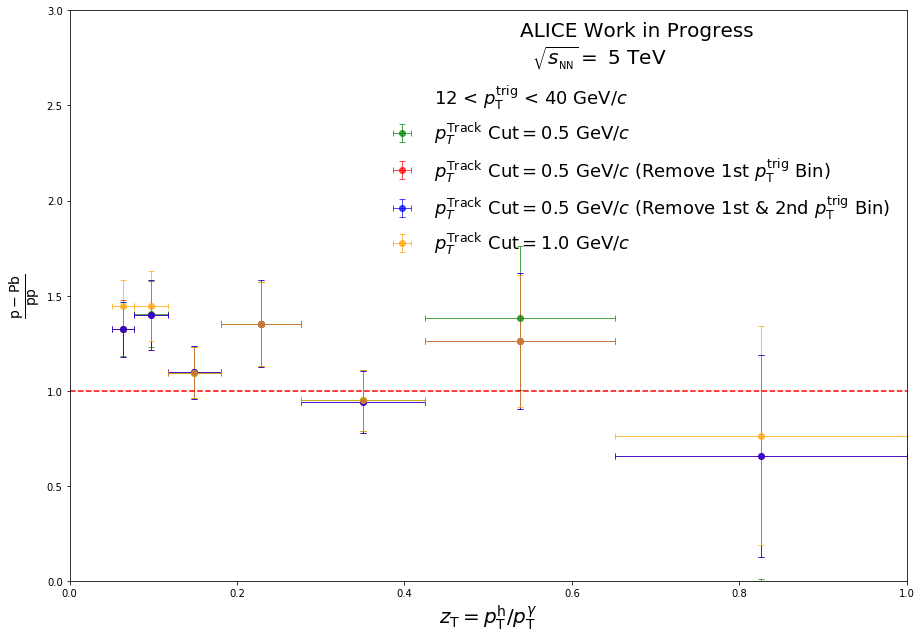

                Central Values:
[ 1.4457051   1.4481745   1.09574319  1.3500227   0.94988511  1.26222862
  0.76439433]

****************************************
Minimizer is Linear
Chi2                      =       5.8766
NDf                       =            5
p0                        =      1.20706   +/-   0.0696382   

****************************************
Minimizer is Linear
Chi2                      =      5.52934
NDf                       =            5
p0                        =      1.19855   +/-   0.0720959   

****************************************
Minimizer is Linear
Chi2                      =      5.55683
NDf                       =            5
p0                        =      1.20015   +/-   0.071502    

****************************************
Minimizer is Linear
Chi2                      =       8.3459
NDf                       =            5
p0                        =      1.24188   +/-   0.0690583   


In [14]:
strings = ["05zT","05zT_3bins","05zT_2bins","1zT"]
string_descriptions = ["$p_{T}^\mathrm{Track}\ \mathrm{Cut} = 0.5\ \mathrm{GeV}/c$",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st & 2nd $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 1.0\ \mathrm{GeV}/c$"]
colors = ["green","red","blue","orange"]
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

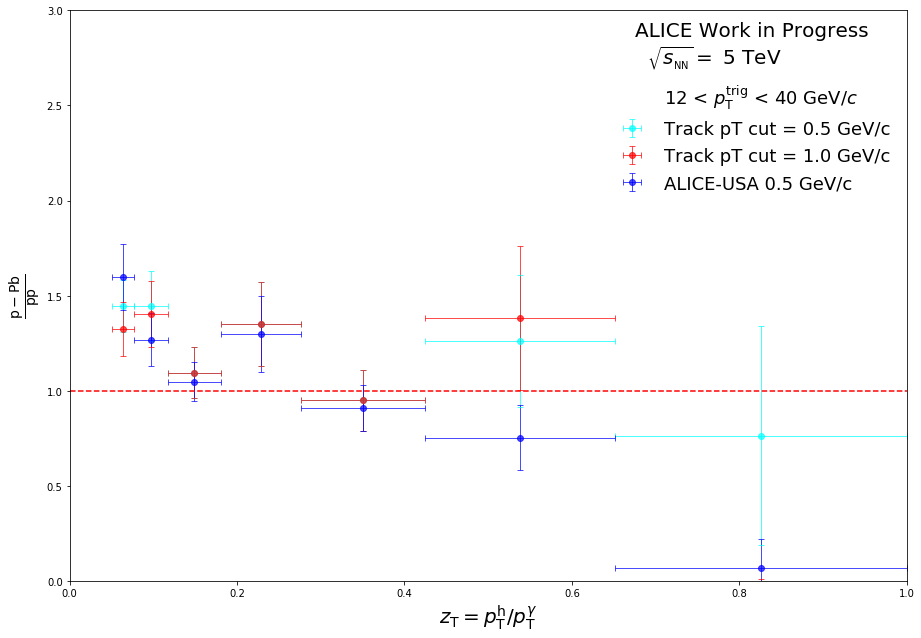

                Central Values:
[ 1.5979682   1.26981434  1.04878313  1.29933689  0.91089677  0.75447711
  0.07122347]

****************************************
Minimizer is Linear
Chi2                      =       8.3459
NDf                       =            5
p0                        =      1.24188   +/-   0.0690583   

****************************************
Minimizer is Linear
Chi2                      =       5.8766
NDf                       =            5
p0                        =      1.20706   +/-   0.0696382   

****************************************
Minimizer is Linear
Chi2                      =      17.6457
NDf                       =            5
p0                        =      1.10395   +/-   0.0570674   


In [15]:
strings = ["1zT","05zT","05zT_working_old"]
string_descriptions = ["Track pT cut = 0.5 GeV/c", "Track pT cut = 1.0 GeV/c","ALICE-USA 0.5 GeV/c"]
colors = ["cyan","red","blue"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

## Compare Trigger Photon pT Binning (3,4,& 5 Bins)

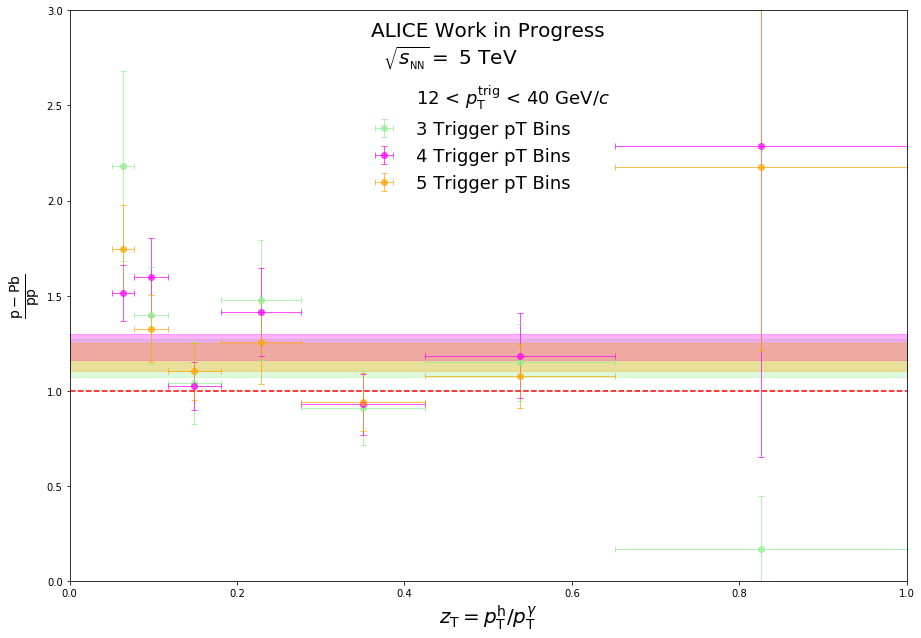

                Central Values:
[ 1.74759929  1.32684886  1.10166038  1.25803898  0.94240937  1.07806614
  2.1777261 ]

****************************************
Minimizer is Linear
Chi2                      =      8.03209
NDf                       =            5
p0                        =      1.17413   +/-   0.0992539   

****************************************
Minimizer is Linear
Chi2                      =      13.7672
NDf                       =            5
p0                        =      1.22951   +/-   0.0689375   

****************************************
Minimizer is Linear
Chi2                      =      9.91674
NDf                       =            5
p0                        =       1.1777   +/-   0.0718672   


In [16]:
strings = ["pT_Rebin_3","pT_Rebin_4","pT_Rebin_5"]
string_descriptions = ["3 Trigger pT Bins", "4 Trigger pT Bins","5 Trigger pT Bins"]
colors = ["lightgreen","magenta","orange"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

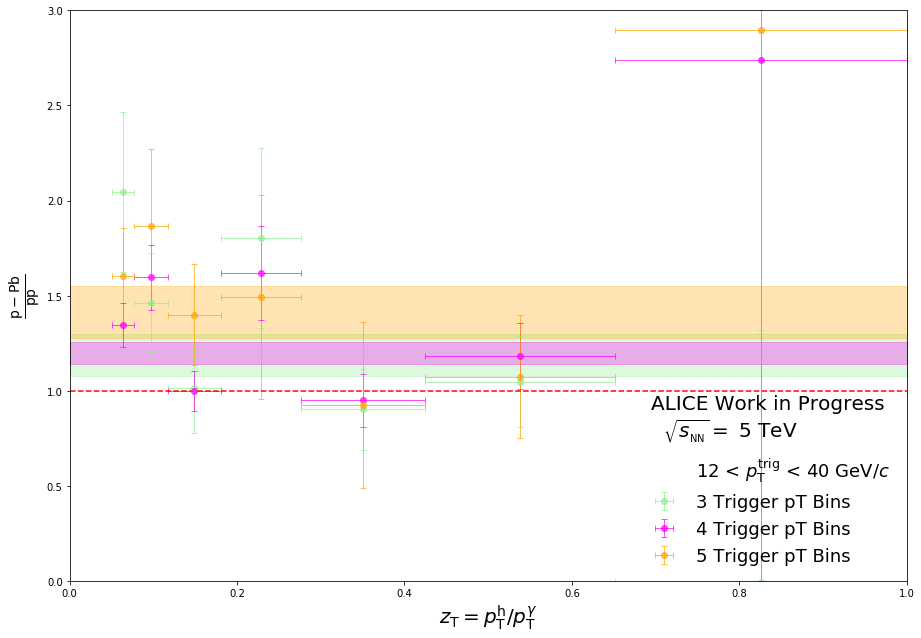

                Central Values:
[ 1.60368295  1.86557271  1.40054509  1.49282524  0.92696167  1.07433435
  2.89808321]

****************************************
Minimizer is Linear
Chi2                      =       9.6993
NDf                       =            5
p0                        =      1.18761   +/-   0.110241    

****************************************
Minimizer is Linear
Chi2                      =      16.5999
NDf                       =            5
p0                        =      1.19858   +/-   0.0575644   

****************************************
Minimizer is Linear
Chi2                      =      4.17259
NDf                       =            5
p0                        =      1.41375   +/-   0.13582     


In [17]:
strings = ["pT_Rebin_3_Cut","pT_Rebin_4_Cut","pT_Rebin_5_Cut"]
string_descriptions = ["3 Trigger pT Bins", "4 Trigger pT Bins","5 Trigger pT Bins"]
colors = ["lightgreen","magenta","orange"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

## Compare ZT Binning (6,7, & 8)

In [18]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


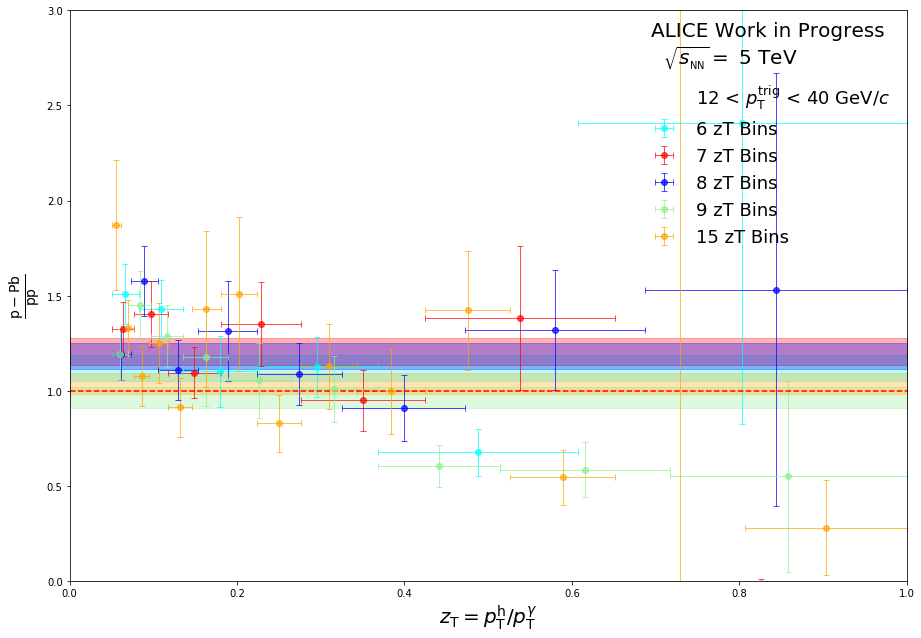

                Central Values:
[ 1.87060069  1.33279792  1.07594827  1.25077422  0.91343145  1.42914142
  1.50908939  0.82971572  1.12926386  0.9983693   1.42230144  0.54562724
  8.00428232  0.28118115]

****************************************
Minimizer is Linear
Chi2                      =      22.9635
NDf                       =            4
p0                        =      1.11802   +/-   0.0678079   

****************************************
Minimizer is Linear
Chi2                      =       5.8766
NDf                       =            5
p0                        =      1.20706   +/-   0.0696382   

****************************************
Minimizer is Linear
Chi2                      =      8.03276
NDf                       =            6
p0                        =      1.18169   +/-   0.0674303   

****************************************
Minimizer is Linear
Chi2                      =       32.454
NDf                       =            7
p0                        =     0.

In [19]:
strings = ["zT_Rebin_6","05zT","zT_Rebin_8","zT_Rebin_9","zT_Rebin_15"]
string_descriptions = ["6 zT Bins", "7 zT Bins", "8 zT Bins","9 zT Bins","15 zT Bins"]
colors = ["cyan","red","blue","lightgreen","orange"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


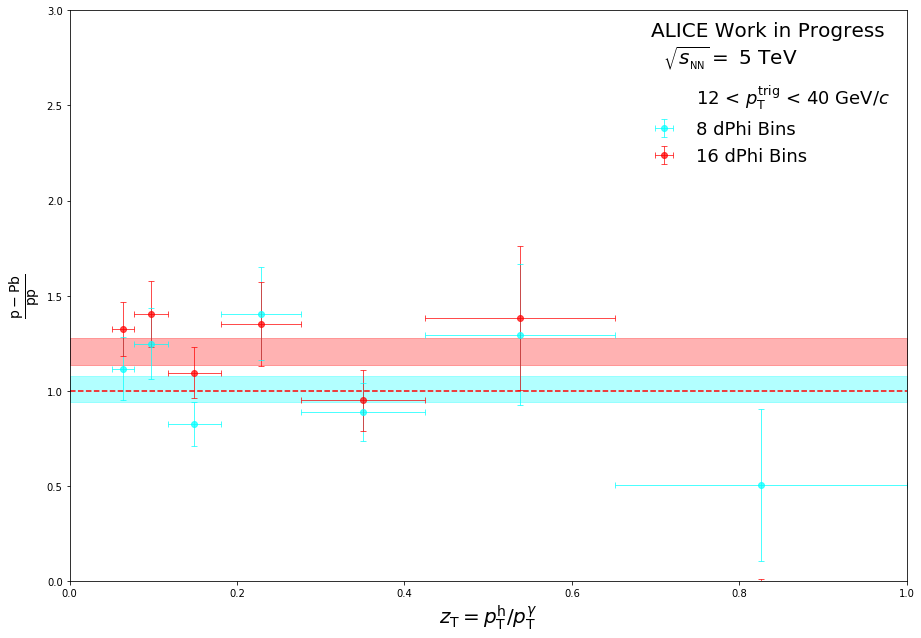

                Central Values:
[ 1.32366377  1.40359966  1.09574319  1.35002169  0.94964235  1.38229225
 -0.24905534]

****************************************
Minimizer is Linear
Chi2                      =      8.52694
NDf                       =            5
p0                        =      1.00889   +/-   0.0689374   

****************************************
Minimizer is Linear
Chi2                      =       5.8766
NDf                       =            5
p0                        =      1.20706   +/-   0.0696382   


In [20]:
strings = ["dPhi_Rebin_16","05zT"]
string_descriptions = ["8 dPhi Bins", "16 dPhi Bins"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


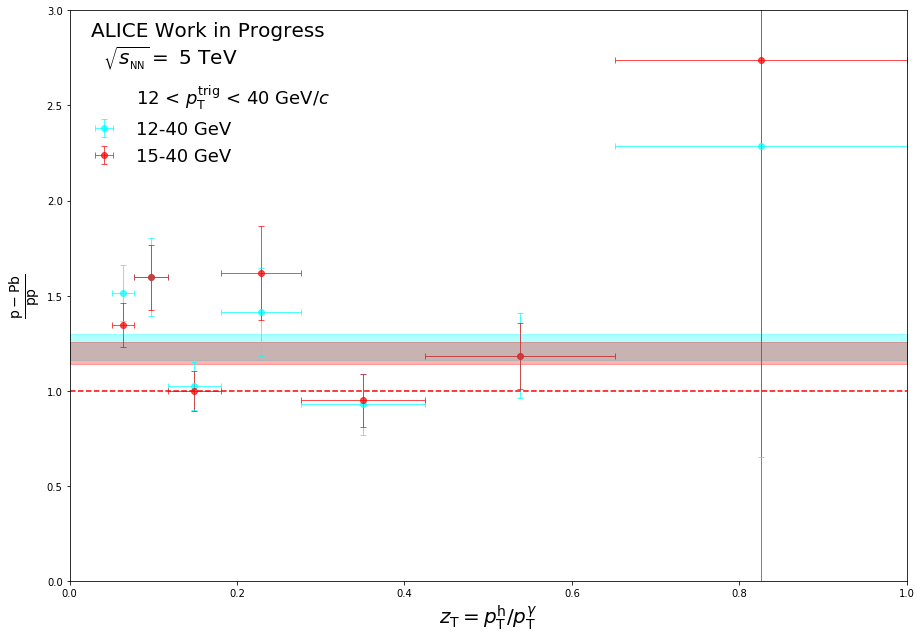

                Central Values:
[ 1.34555207  1.59583687  0.99905319  1.61926902  0.94942324  1.18174526
  2.73688196]

****************************************
Minimizer is Linear
Chi2                      =      13.7672
NDf                       =            5
p0                        =      1.22951   +/-   0.0689375   

****************************************
Minimizer is Linear
Chi2                      =      16.5999
NDf                       =            5
p0                        =      1.19858   +/-   0.0575644   


In [21]:
strings = ["pT_Rebin_4","pT_Rebin_4_Cut"]
string_descriptions = ["12-40 GeV", "15-40 GeV"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


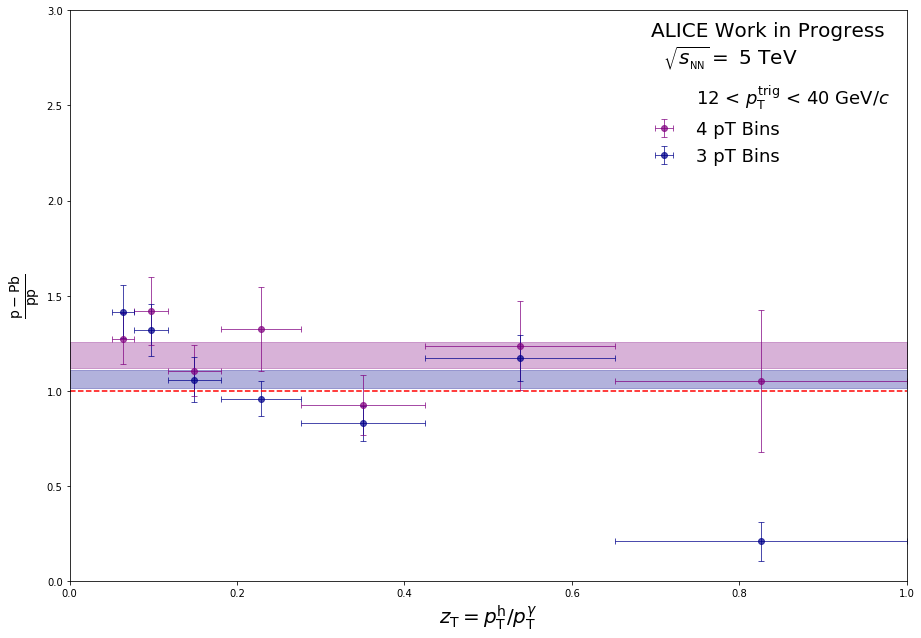

                Central Values:
[ 1.41661878  1.31934069  1.05935782  0.95893096  0.8298763   1.17231065
  0.20835547]

****************************************
Minimizer is Linear
Chi2                      =      5.68487
NDf                       =            5
p0                        =      1.18878   +/-   0.0671922   

****************************************
Minimizer is Linear
Chi2                      =      18.2339
NDf                       =            5
p0                        =      1.06135   +/-   0.0457129   


In [22]:
strings = ["pT_Rebin_4_Weights","pT_Rebin_3_Weights"]
string_descriptions = ["4 pT Bins", "3 pT Bins"]
colors = ["purple","darkblue"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


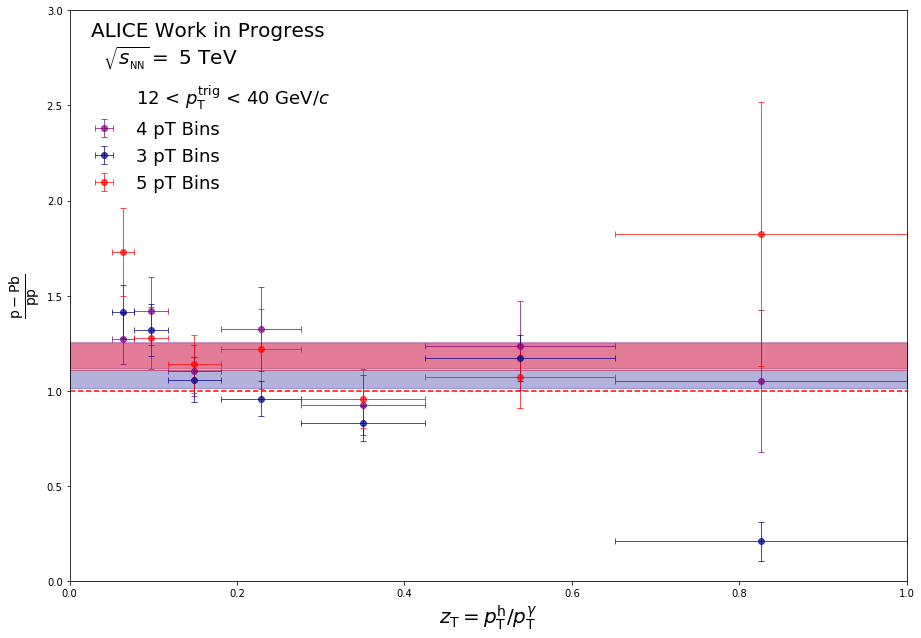

                Central Values:
[ 1.72859122  1.27833192  1.14130972  1.21926324  0.95820685  1.07461134
  1.82442443]

****************************************
Minimizer is Linear
Chi2                      =      5.68487
NDf                       =            5
p0                        =      1.18878   +/-   0.0671922   

****************************************
Minimizer is Linear
Chi2                      =      18.2339
NDf                       =            5
p0                        =      1.06135   +/-   0.0457129   

****************************************
Minimizer is Linear
Chi2                      =      8.54903
NDf                       =            5
p0                        =      1.18012   +/-   0.0706834   


In [23]:
strings = ["pT_Rebin_4_Weights","pT_Rebin_3_Weights","pT_Rebin_5_Weights"]
string_descriptions = ["4 pT Bins", "3 pT Bins","5 pT Bins"]
colors = ["purple","darkblue","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


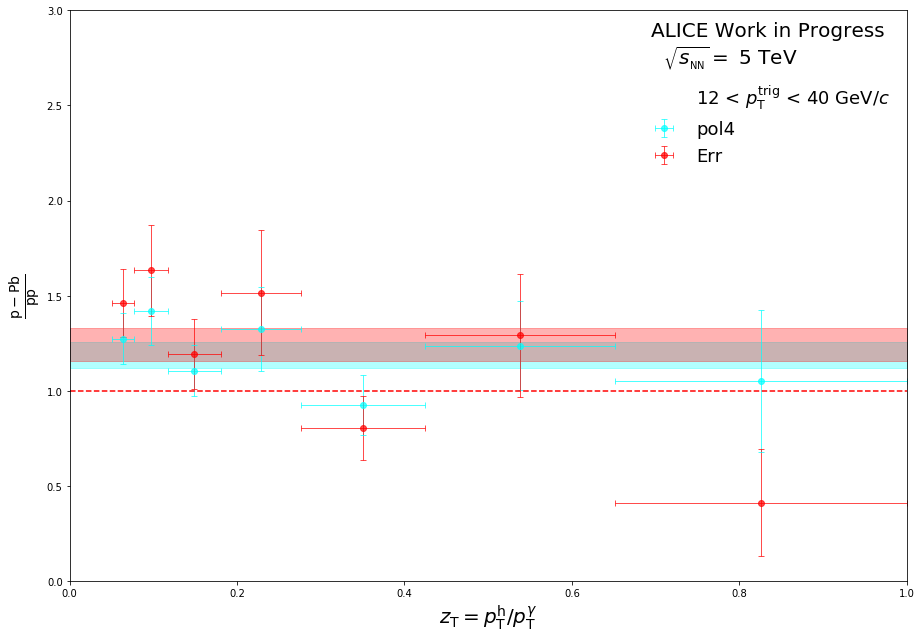

                Central Values:
[ 1.46092097  1.63384614  1.19441755  1.51656857  0.8036661   1.29094692
  0.4121031 ]

****************************************
Minimizer is Linear
Chi2                      =      5.68487
NDf                       =            5
p0                        =      1.18878   +/-   0.0671922   

****************************************
Minimizer is Linear
Chi2                      =       11.703
NDf                       =            5
p0                        =      1.24168   +/-   0.0868613   


In [24]:
strings = ["pT_Rebin_4_Weights","pT_Rebin_4_ErrWeights"]
string_descriptions = ["pol4", "Err"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


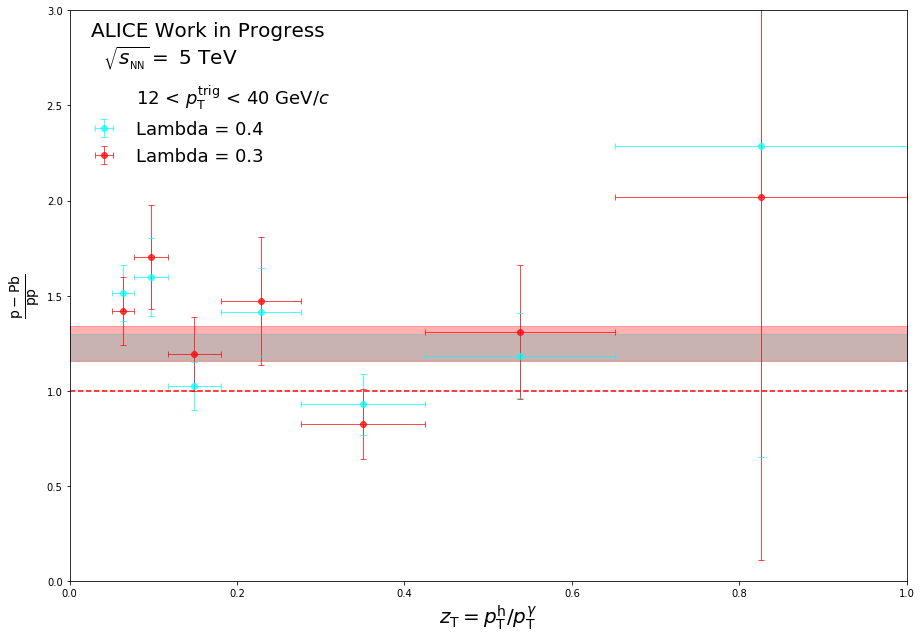

                Central Values:
[ 1.41941026  1.70222614  1.19527022  1.4729536   0.82636153  1.31005331
  2.01777407]

****************************************
Minimizer is Linear
Chi2                      =      13.7672
NDf                       =            5
p0                        =      1.22951   +/-   0.0689375   

****************************************
Minimizer is Linear
Chi2                      =      9.42663
NDf                       =            5
p0                        =      1.24905   +/-   0.0924882   


In [25]:
strings = ["pT_Rebin_4","pT_Rebin_4_Lambda"]
string_descriptions = ["Lambda = 0.4", "Lambda = 0.3"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [26]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

In [27]:
strings = ["pT_Rebin_4","pT_Rebin_4_Lambda"]
string_descriptions = ["Lambda = 0.4", "Lambda = 0.3"]
colors = ["cyan","red"]
Chi2 = Get_pp_pPb_FF_Chi2("pT_Rebin_4")

(0.0, 0, 0)
(0.18413416969563537, 2, 0)
0.912043963162


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hist (Potential memory leak).
TH1F::Chi2TestX:0: RuntimeWarning: Both histograms are not unweighted and option UU has been requested


<Figure size 1080x756 with 0 Axes>

In [28]:
print(pTbins)

[12.0, 40.0]
